# **Data Preparation Pipeline**

# Setup

## Check library versions

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import joblib

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Global constants

In [2]:
PROJECT_ROOT_DIR = "."
DATASET_DIR="datasets"
HOUSING_PATH = os.path.join(PROJECT_ROOT_DIR, DATASET_DIR)
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
MODELS_PATH = os.path.join(PROJECT_ROOT_DIR, "models")

## Utility functions

In [3]:
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def save_model(model, name):
    p = os.path.join(MODELS_PATH, name)
    joblib.dump(model, p)

def load_model(model_name):
    p = os.path.join(MODELS_PATH, model_name)
    m = None
    if os.path.exists(p):
        m = joblib.load(p)
    return m

# Load dataset housing.csv

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()


In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Overviewing of our dataset

Saving figure attribute_histogram_plots


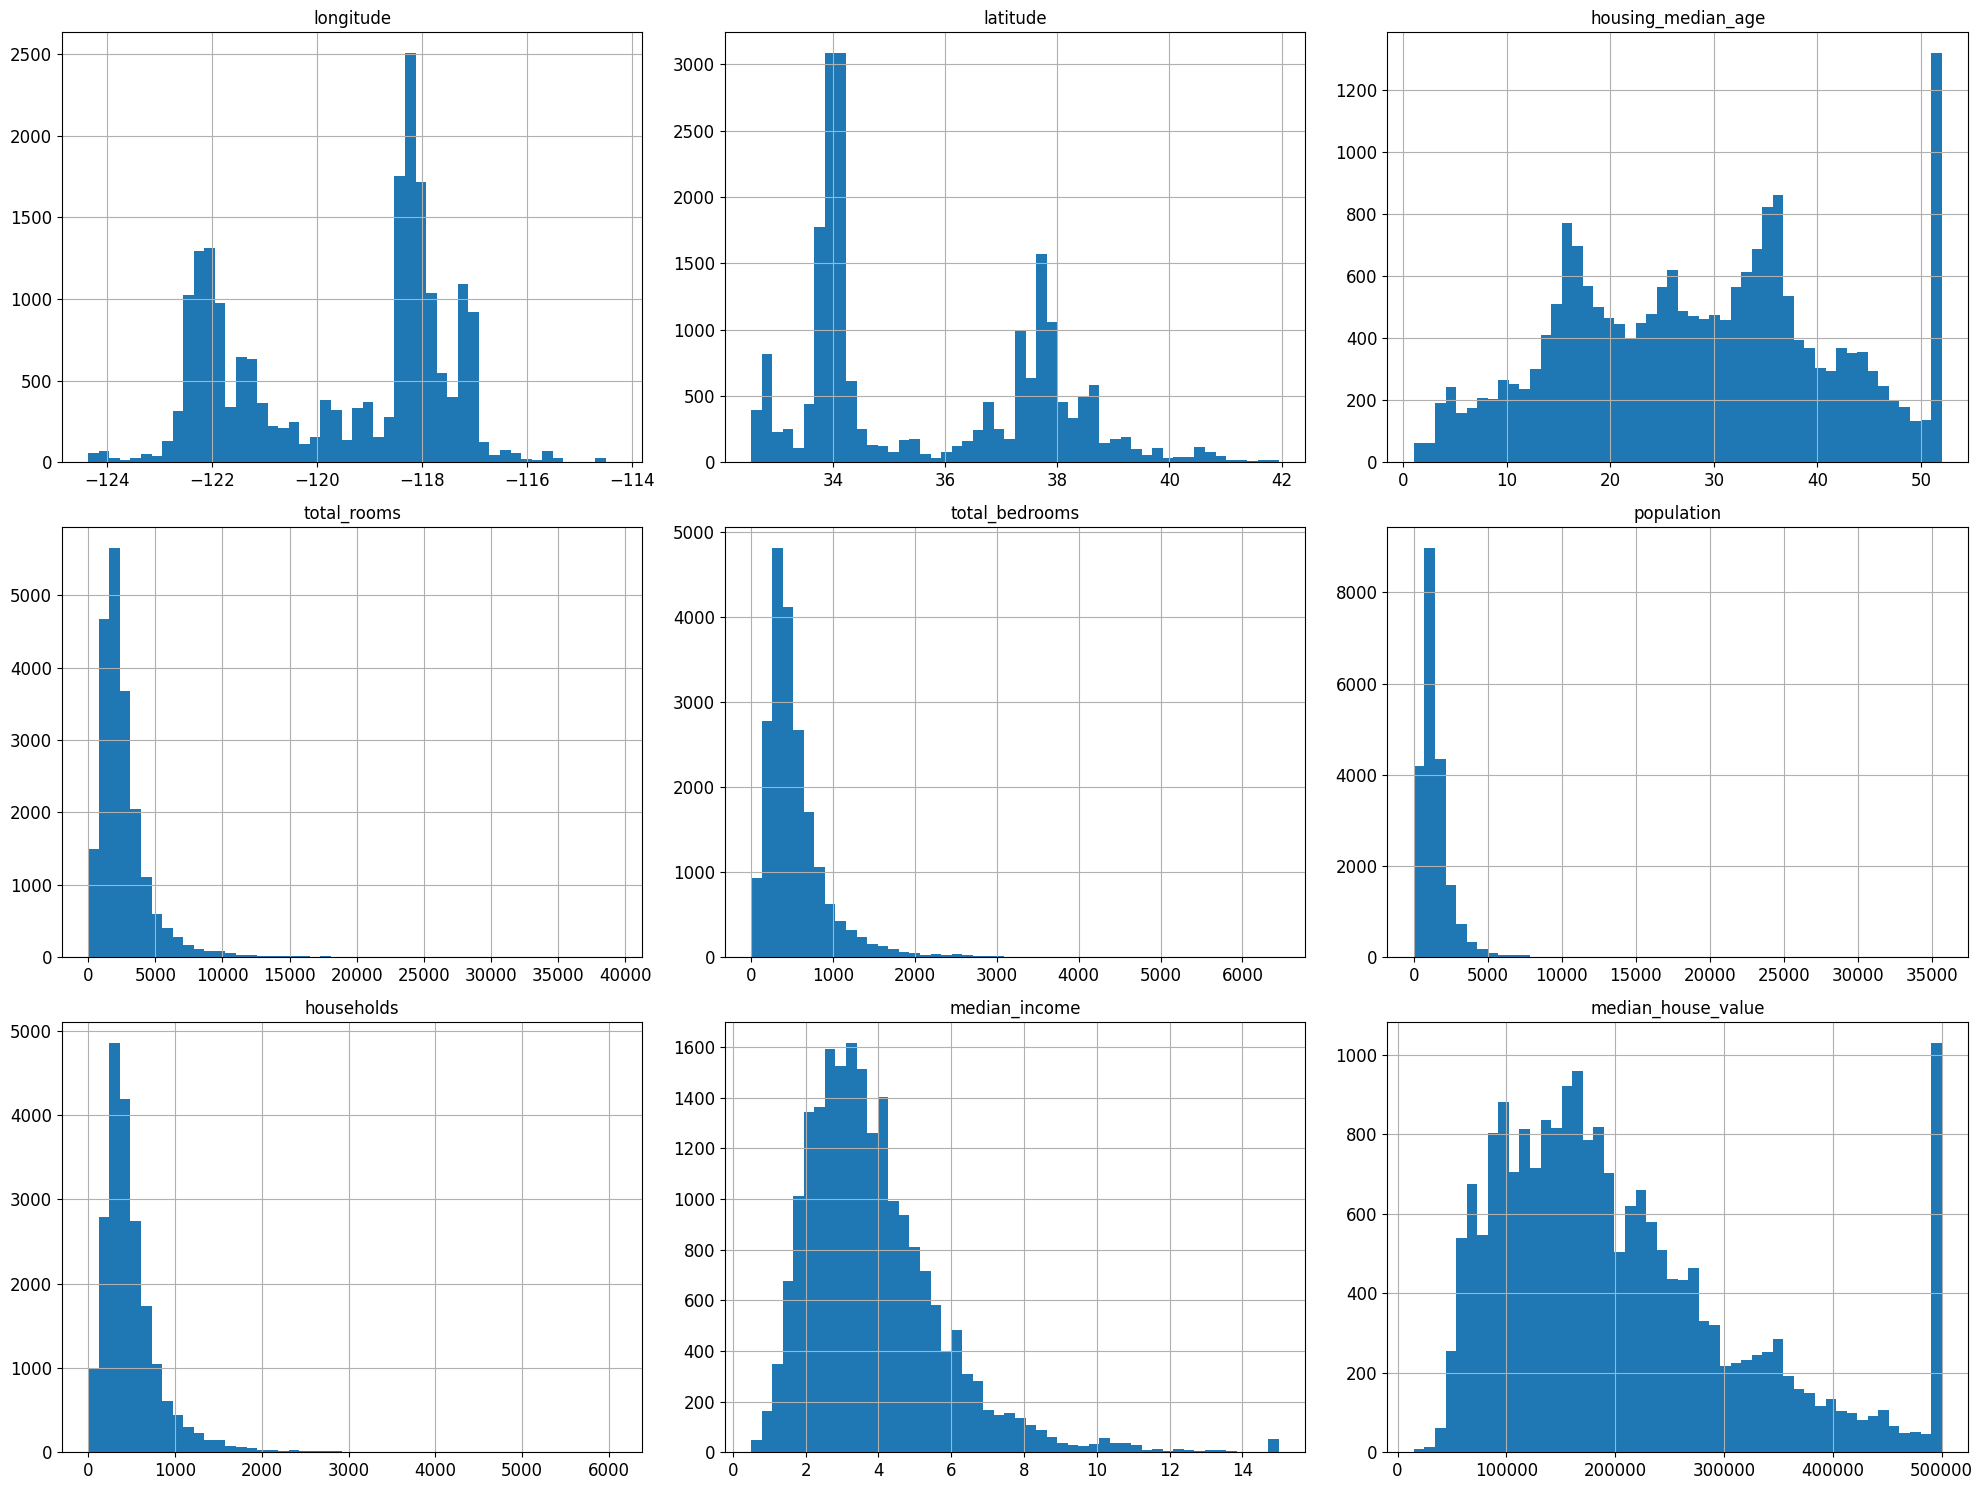

In [9]:
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

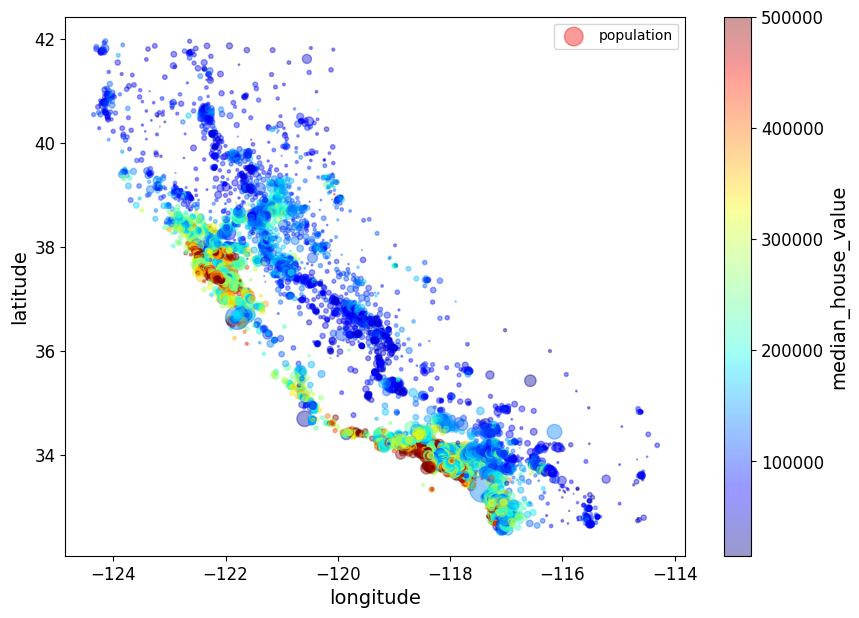

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

# Prepare data

## Test set

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [12]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<Axes: >

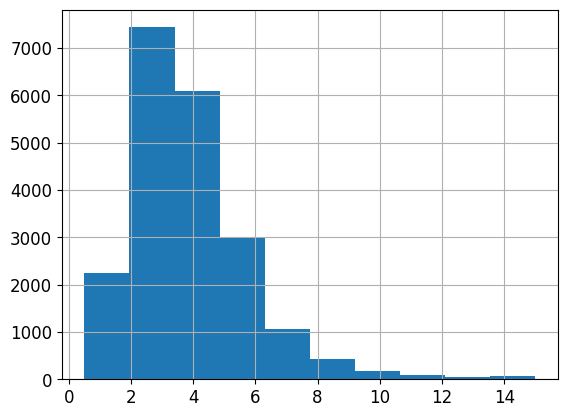

In [13]:
housing["median_income"].hist()

## Stratified Sampling

In [14]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

<Axes: >

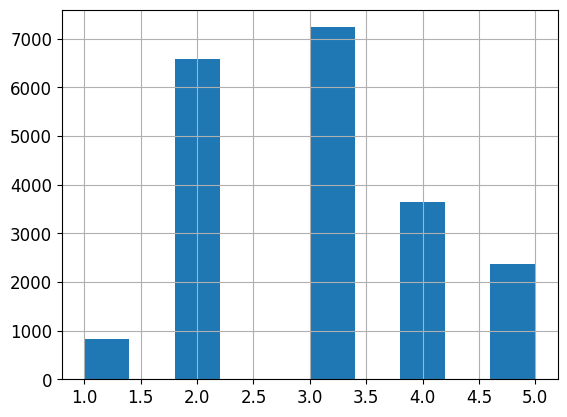

In [15]:
housing["income_cat"].hist()

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [18]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [19]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [20]:
housing = strat_train_set.copy()

In [21]:
corr_matrix = housing.corr(numeric_only=True)

corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

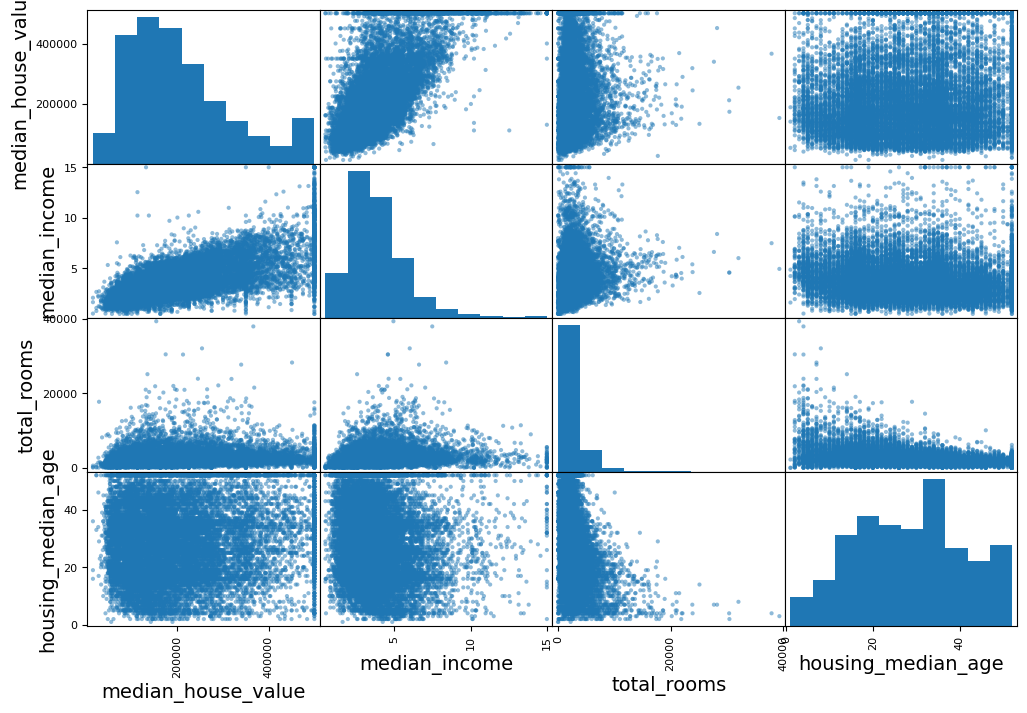

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(np.float64(0.0), np.float64(16.0), np.float64(0.0), np.float64(550000.0))

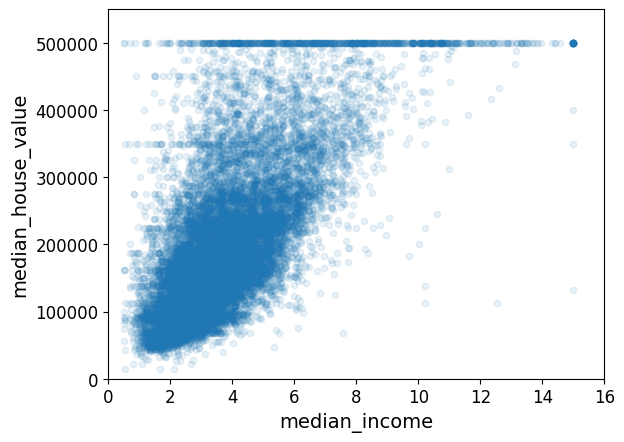

In [24]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

## Data cleaning

In [25]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [26]:
housing.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,False,False,False,False,False,False,False,False,False
15502,False,False,False,False,False,False,False,False,False
2908,False,False,False,False,False,False,False,False,False
14053,False,False,False,False,False,False,False,False,False
20496,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
15174,False,False,False,False,False,False,False,False,False
12661,False,False,False,False,False,False,False,False,False
19263,False,False,False,False,False,False,False,False,False
19140,False,False,False,False,False,False,False,False,False


In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [28]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [29]:
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [30]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [31]:
imputer.strategy

'median'

In [32]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [33]:
X = imputer.transform(housing_num)

## Handling text

In [34]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [35]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [36]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [37]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

## Transformers

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [39]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [41]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]], shape=(16512, 11))

In [42]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [43]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]], shape=(16512, 16))

In [44]:
housing_prepared.shape

(16512, 16)

# Train model

## Linear Regression

In [45]:
# from sklearn.linear_model import LinearRegression

# lin_reg = LinearRegression()
# lin_reg.fit(housing_prepared, housing_labels)

# save_model(lin_reg, 'lin_reg')

lin_reg = load_model('lin_reg')

In [46]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [47]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [48]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [49]:
some_data1 = housing.iloc[6:7]
lb = housing_labels.iloc[6:7]
print(some_data1)

sd1 = full_pipeline.transform(some_data1)

pred = lin_reg.predict(sd1)

print(f'Predict: {pred}, Label: {list(lb)}')

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18125    -122.03     37.33                23.0       4221.0           671.0   

       population  households  median_income ocean_proximity  
18125      1782.0       641.0         7.4863       <1H OCEAN  
Predict: [376422.05961781], Label: [412300.0]


## Decision Tree Regression

In [50]:
# from sklearn.tree import DecisionTreeRegressor

# tree_reg = DecisionTreeRegressor(random_state=42)
# tree_reg.fit(housing_prepared, housing_labels)

# save_model(tree_reg, 'tree_reg')

tree_reg = load_model('tree_reg')

## Random Forest Regression

In [51]:
# from sklearn.ensemble import RandomForestRegressor

# forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# forest_reg.fit(housing_prepared, housing_labels)

# save_model(forest_reg, 'forest_reg')

forest_reg = load_model('forest_reg')

## Support Vector Machine

SVM includes various implementations such as SVC for classification and SVR for regression. The goal of SVM is to find a hyperplane that best separates the classes in the feature space. Support Vector Classification (SVC) is a binary classifier that aims to classify the data points into one of two classes.

### Linear kernel

In [52]:
from sklearn.svm import SVR

# svr_lin = SVR(kernel="linear")
# svr_lin.fit(housing_prepared, housing_labels)

# save_model(svr_lin, 'svr_lin')

svr_lin = load_model('svr_lin')

### Polynominal

In [53]:
# svr_poly = SVR(kernel='poly')
# svr_poly.fit(housing_prepared, housing_labels)

# save_model(svr_poly, 'svr_poly')

svr_poly = load_model('svr_poly')

### RBF (Radial Basis Function)

In [54]:
# svr_rbf = SVR(kernel='rbf')
# svr_rbf.fit(housing_prepared, housing_labels)

# save_model(svr_rbf, 'svr_rbf')

svr_rbf = load_model('svr_rbf')

# Models evaluation

**RMSE on training set** measures how well the model fit the training data.

**RMSE from Cross Validation** measures how well the model generalizes to new data.

In [55]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

## 1. Linear Regression

**RMSE**

In [56]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(68627.87390018745)

In [57]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915801

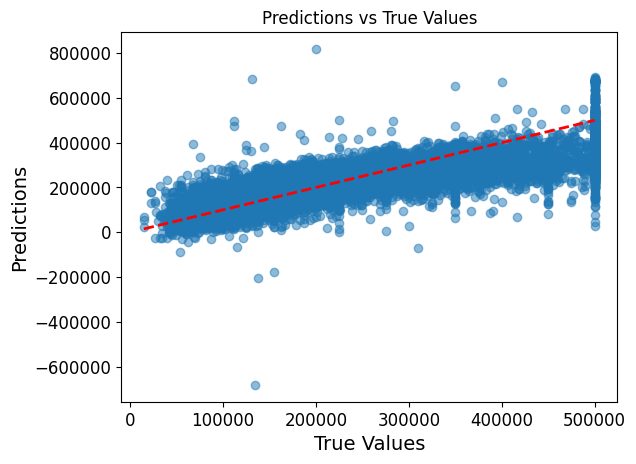

In [58]:
plt.scatter(housing_labels, housing_predictions, alpha=0.5)
plt.plot([housing_labels.min(), housing_labels.max()],
        [housing_labels.min(), housing_labels.max()],
        'r--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predictions vs True Values")
plt.show()

**Cross validation**

In [59]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180634


## 2. Decision Tree Regression

**RMSE**

In [60]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

**Cross validation**

In [61]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


## 3. Random Forest Regression

**RMSE**

In [62]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(18650.698705770003)

**Cross validation**

In [63]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


## 4. SVR Linear

**RMSE**

In [64]:
housing_predictions = svr_lin.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

np.float64(111095.06635291966)

**Cross validation**

In [65]:
svr_lin_scores = cross_val_score(svr_lin, housing_prepared, housing_labels,
                                 scoring="neg_mean_squared_error", cv=10)
svr_lin_scores_rmse = np.sqrt(-svr_lin_scores)

display_scores(svr_lin_scores_rmse)

Scores: [110518.40356474 112956.5486846  106998.56227015 113590.97575445
 107782.52294955 116063.7781669  113279.08892636 111836.81295967
 113168.96643781 111945.40954593]
Mean: 111814.1069260169
Standard deviation: 2600.840269089257


## 5. SVR Polynominal

**RMSE**

In [66]:
housing_predictions = svr_poly.predict(housing_prepared)
svr_poly_mse = mean_squared_error(housing_labels, housing_predictions)
svr_poly_rmse = np.sqrt(svr_poly_mse)
svr_poly_rmse

np.float64(118429.61476365756)

**Cross validation**

In [67]:
svr_poly_scores = cross_val_score(svr_poly, housing_prepared, housing_labels,
                                 scoring="neg_mean_squared_error", cv=10)
svr_poly_scores_rmse = np.sqrt(-svr_poly_scores)

display_scores(svr_poly_scores_rmse)

Scores: [116631.48683272 120067.03962509 114120.75279813 120336.06224697
 116047.67419748 122684.28511773 119759.16852962 118396.96066063
 120119.99447634 118794.5082534 ]
Mean: 118695.79327381204
Standard deviation: 2365.2044035633567


## 6. SVR RBF

**RMSE**

In [68]:
housing_predictions = svr_rbf.predict(housing_prepared)
svr_rbf_mse = mean_squared_error(housing_labels, housing_predictions)
svr_rbf_rmse = np.sqrt(svr_rbf_mse)
svr_rbf_rmse

np.float64(118578.69234925653)

**Cross validation**

In [69]:
svr_rbf_scores = cross_val_score(svr_rbf, housing_prepared, housing_labels,
                                 scoring="neg_mean_squared_error", cv=10)
svr_rbf_scores_rmse = np.sqrt(-svr_rbf_scores)

display_scores(svr_rbf_scores_rmse)

Scores: [116729.13778306 120113.99351281 113925.04340616 120399.11878641
 114687.49942071 122785.64737282 119853.79338279 118280.31108193
 120230.82615529 118840.1885232 ]
Mean: 118584.55594251942
Standard deviation: 2609.6120823493407


# Try out different SVR hyperparameters

!! Warning: >20 minutes running !!

In [70]:
# from sklearn.model_selection import GridSearchCV

# param_grid = [
#         {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
#         {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
#          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
#     ]

# svm_reg = SVR()
# grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
# grid_search.fit(housing_prepared, housing_labels)

## Save the model for later use

In [71]:
# save_model(grid_search, 'grid_search_cv')

grid_search = load_model('grid_search_cv')

In [72]:
grid_search.cv_results_['param_C']

masked_array(data=[10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0,
                   30000.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0,
                   3.0, 3.0, 3.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0,
                   30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 100.0, 100.0,
                   100.0, 100.0, 100.0, 100.0, 300.0, 300.0, 300.0, 300.0,
                   300.0, 300.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000.0,
                   1000.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=1e+20)

## Best SVR model is Linear with hyperparameters

In [73]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

np.float64(70286.61834566393)

In [74]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

## Retrain a new SVR with kernel Linear and hyperparameters

In [75]:
from sklearn.svm import SVR

svm_lin_hyper = SVR(kernel="linear", C=30000)
svm_lin_hyper.fit(housing_prepared, housing_labels)

save_model(svm_lin_hyper, 'svm_lin_hyper')

svm_lin_hyper = load_model('svm_lin_hyper')

**RMSE**

In [76]:
housing_predictions = svm_lin_hyper.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

np.float64(70158.80249095152)

**Cross validation**

In [77]:
svr_lin_scores = cross_val_score(svm_lin_hyper, housing_prepared, housing_labels,
                                 scoring="neg_mean_squared_error", cv=10)
svr_lin_scores_rmse = np.sqrt(-svr_lin_scores)

display_scores(svr_lin_scores_rmse)

Scores: [72585.99455979 66004.56577373 67153.96603432 70209.98376571
 67114.11046364 73913.79461485 77198.45821753 69982.70790177
 67526.44188193 70919.95242534]
Mean: 70260.9975638612
Standard deviation: 3354.7386844536286


=> The SVR Linear performs slightly better than Linear Regression algorithm

# Conclusion for lab 2

## Comparison between models performances

|  | Linear Regression | Decision Tree Regression | Random Forest Regresson | SVR Linear | SVR Poly | SVR RBF | SVR Hyper |
|----|----|----|----|----|----|----|----|
| RMSE | 68627.87 | 0.0 | 18650.69 | 111095.06 | 118429.61 | 118578.69 | 70158.80 |
| CV | 69104.07 &pm;2880.3 | 71629.89 &pm;2914. | 50435.58 &pm;2203.33 | 111814.10 &pm;2600.84| 118695.79 &pm;2365.2 | 118584.55 &pm;2609.61| 70260.99 &pm;3354.73 |

In [78]:
from sklearn.model_selection import LearningCurveDisplay, learning_curve, ShuffleSplit

def plot_learning_curves(models, X, y):
    l = len(models)
    max_per_row = 3
    quo, rem = divmod(l, max_per_row)
    rows = quo
    if rem:
        rows += 1

    fig, ax = plt.subplots(nrows=rows, ncols=max_per_row, figsize=(15, 6), sharey=True)
    plt.subplots_adjust(hspace=0.5)

    common_params = {
        "X": X,
        "y": y,
        "train_sizes": [1, 100, 1000, 2000, 3000, 5000],
        "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
        "score_type": "both",
        "scoring": "neg_root_mean_squared_error",
        "score_name": "Neg RMSE",
        "std_display_style": None,
    }

    for col in range(max_per_row):
        for row in range(rows):
            if rows == 1:
                the_ax = ax[col]
            else:
                the_ax = ax[row, col]

            estimator = models[row * max_per_row + col]
            LearningCurveDisplay.from_estimator(estimator, **common_params, ax=the_ax)
            handles, label = the_ax.get_legend_handles_labels()
            the_ax.legend(handles[:2], ["Train Score", "Test Score"])
            the_ax.set_title(f"{estimator.__class__.__name__}")
            the_ax.set_xlabel("Set size")

Saving figure learning_curve_comparison


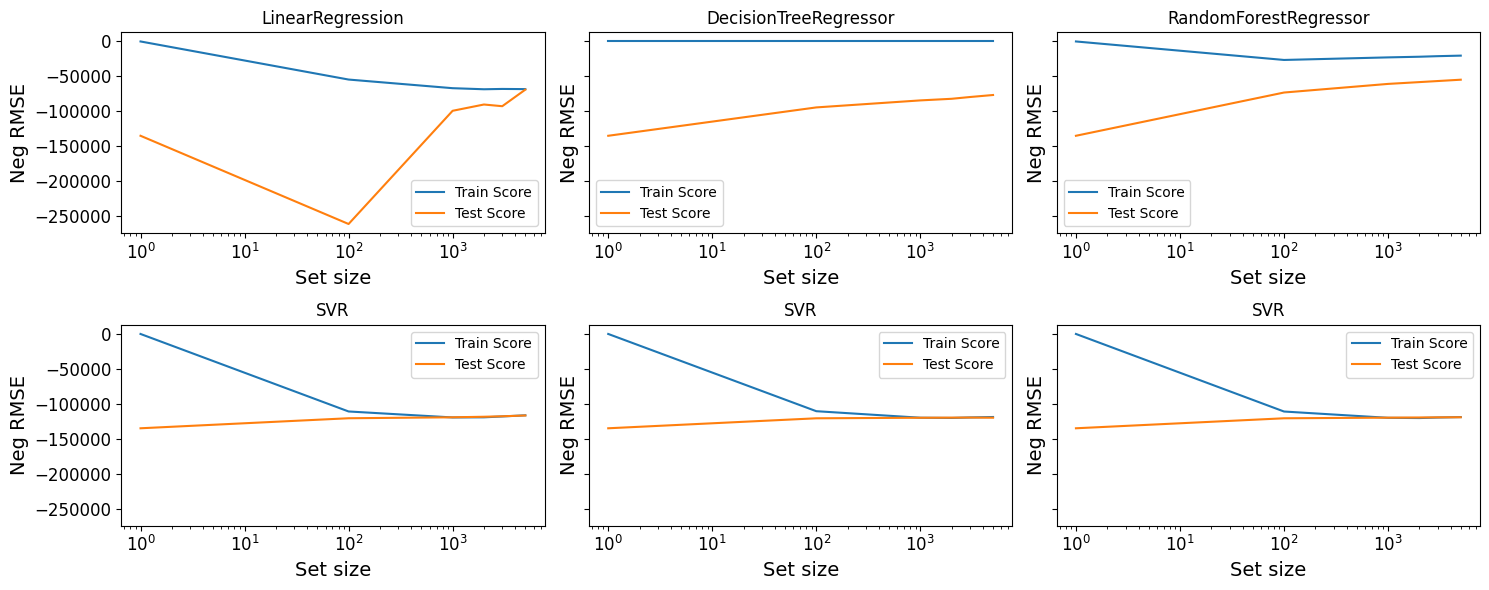

In [79]:
plot_learning_curves([lin_reg, tree_reg, forest_reg, svr_lin, svr_poly, svr_rbf], housing_prepared, housing_labels)
save_fig("learning_curve_comparison")

# Lab 3 - Fine tuning the models

In [80]:
def print_search_score(seacher):
    cvres = seacher.cv_results_

    for mean_scores, params in sorted(zip(cvres['mean_test_score'], cvres['params']), reverse=True, key=lambda x: x[0]):
        print(np.sqrt(-mean_scores), params)

# GridSearchCV

## Linear Regressor

In [81]:
from sklearn.model_selection import GridSearchCV

# param_grid = [
#     {'fit_intercept':[False], 'tol':[1.0e-6, 1.0e-5, 1.0e-4]},
#     {'fit_intercept':[False], 'tol':[1.0e-5, 1.0e-4, 1.0e-2], 'positive':[True]},
# ]

# lin_grid_search = GridSearchCV(lin_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# lin_grid_search.fit(housing_prepared, housing_labels)

# save_model(lin_grid_search, 'lin_grid_search')

lin_grid_search = load_model('lin_grid_search')

In [82]:
lin_grid_search.best_params_

{'fit_intercept': False, 'tol': 1e-06}

In [83]:
print_search_score(lin_grid_search)

69166.4308990913 {'fit_intercept': False, 'tol': 1e-06}
69166.4308990913 {'fit_intercept': False, 'tol': 1e-05}
69166.4308990913 {'fit_intercept': False, 'tol': 0.0001}
72667.76100404409 {'fit_intercept': False, 'positive': True, 'tol': 1e-05}
72667.76100404409 {'fit_intercept': False, 'positive': True, 'tol': 0.0001}
72667.76100404409 {'fit_intercept': False, 'positive': True, 'tol': 0.01}


## Decision Tree Regressor

In [84]:
# param_grid = [
#     {
#         'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
#         'splitter':['best','random'],
#         'max_features':[6, 'sqrt', 'log2'],
#         'max_depth':[5,10,20,30],
#         'min_impurity_decrease': [0.1, 0.01, 0.001, 0.0001]
#     },
#     # {
#     #     'criterion':['squared_error'],
#     #     'splitter':['best'],
#     #     'max_features':[6],
#     #     'max_depth':[10],
#     #     'min_samples_leaf':[6]
#     # },
#     # {
#     #     'criterion':['squared_error'],
#     #     'splitter':['best'],
#     #     'max_features':[6],
#     #     'max_depth':[10],
#     #     'min_samples_leaf':[6],
#     #     'min_impurity_decrease': [0.1, 0.01, 0.001, 0.0001]
#     # },
# ]

# tree_grid_search = GridSearchCV(tree_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# tree_grid_search.fit(housing_prepared, housing_labels)

# save_model(tree_grid_search, 'tree_grid_search')

tree_grid_search = load_model('tree_grid_search')

In [85]:
tree_grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': 10,
 'max_features': 6,
 'min_impurity_decrease': 0.1,
 'splitter': 'best'}

In [86]:
print_search_score(tree_grid_search)

64026.32405419272 {'criterion': 'poisson', 'max_depth': 10, 'max_features': 6, 'min_impurity_decrease': 0.1, 'splitter': 'best'}
64358.021805700424 {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 6, 'min_impurity_decrease': 0.01, 'splitter': 'best'}
64358.021805700424 {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 6, 'min_impurity_decrease': 0.001, 'splitter': 'best'}
64673.47036661545 {'criterion': 'poisson', 'max_depth': 10, 'max_features': 6, 'min_impurity_decrease': 0.01, 'splitter': 'best'}
64894.2574915667 {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 6, 'min_impurity_decrease': 0.0001, 'splitter': 'best'}
64910.55530584554 {'criterion': 'poisson', 'max_depth': 10, 'max_features': 6, 'min_impurity_decrease': 0.0001, 'splitter': 'best'}
64910.59548120535 {'criterion': 'poisson', 'max_depth': 10, 'max_features': 6, 'min_impurity_decrease': 0.001, 'splitter': 'best'}
64962.704401828014 {'criterion': 'friedman_mse', 'max_depth': 1

## Random Forest Regressor

In [87]:
# param_grid = [
#     {'n_estimators':[3, 10, 30], 'max_features':[2,4,6,8]},
#     {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
# ]

# forest_grid_search = GridSearchCV(forest_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# forest_grid_search.fit(housing_prepared, housing_labels)

# save_model(forest_grid_search, 'forest_grid_search')

forest_grid_search = load_model('forest_grid_search')

In [88]:
forest_grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

Evaluate it's scores. Here we sort all the pair of score/params, the lower the score the better.

In [89]:
print_search_score(forest_grid_search)

49898.98913455217 {'max_features': 8, 'n_estimators': 30}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
51278.37877140253 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
57831.136061214274 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
60075.3680329983 {'max_features':

## SVR (The model with best hyperparameters)

# RandomizedSearchCV

## Linear Regressor

In [90]:
from sklearn.model_selection import RandomizedSearchCV

# param_distribs = {
#     'fit_intercept': [True, False],
#     'positive': [True, False],
#     'copy_X': [True, False],
#     'n_jobs': [1, 5, 10, 15, None]
# }

# lin_random_search = RandomizedSearchCV(lin_reg, param_distributions=param_distribs, cv=5, n_iter=10, scoring='neg_mean_squared_error')

# lin_random_search.fit(housing_prepared, housing_labels)

# save_model(lin_random_search, 'lin_random_search')

lin_random_search = load_model('lin_random_search')

In [91]:
lin_random_search.best_params_

{'positive': False, 'n_jobs': 5, 'fit_intercept': True, 'copy_X': True}

In [92]:
print_search_score(lin_random_search)

69077.32049039399 {'positive': False, 'n_jobs': 5, 'fit_intercept': True, 'copy_X': True}
69166.4308990913 {'positive': False, 'n_jobs': 5, 'fit_intercept': False, 'copy_X': False}
69166.4308990913 {'positive': False, 'n_jobs': 15, 'fit_intercept': False, 'copy_X': False}
69166.4308990913 {'positive': False, 'n_jobs': 10, 'fit_intercept': False, 'copy_X': False}
72588.58966352788 {'positive': True, 'n_jobs': None, 'fit_intercept': True, 'copy_X': True}
72588.58966352788 {'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
72588.58966352788 {'positive': True, 'n_jobs': None, 'fit_intercept': True, 'copy_X': False}
72588.58966352788 {'positive': True, 'n_jobs': 10, 'fit_intercept': True, 'copy_X': False}
72667.76100404409 {'positive': True, 'n_jobs': None, 'fit_intercept': False, 'copy_X': True}
72667.76100404409 {'positive': True, 'n_jobs': None, 'fit_intercept': False, 'copy_X': False}


## Decision Tree Regressor

In [ ]:
# param_distribs = {
#     'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
#     'splitter':['best'],
#     'max_features':[6, 'sqrt', 'log2'],
#     'max_depth':[5,10,20],
#     'min_impurity_decrease': [0.1, 0.01, 0.001, 0.0001],
#     'ccp_alpha':[0,0.1,0.01]
# }

# tree_random_search = RandomizedSearchCV(tree_reg, param_distributions=param_distribs, cv=5, n_iter=10, scoring='neg_mean_squared_error')

# tree_random_search.fit(housing_prepared, housing_labels)

# save_model(tree_random_search, 'tree_random_search')

tree_random_search = load_model('tree_random_search')

In [94]:
tree_random_search.best_params_

{'splitter': 'best',
 'min_impurity_decrease': 0.1,
 'max_features': 6,
 'max_depth': 10,
 'criterion': 'poisson',
 'ccp_alpha': 0.01}

In [95]:
print_search_score(tree_random_search)

64026.32405419272 {'splitter': 'best', 'min_impurity_decrease': 0.1, 'max_features': 6, 'max_depth': 10, 'criterion': 'poisson', 'ccp_alpha': 0.01}
67019.73839202506 {'splitter': 'best', 'min_impurity_decrease': 0.1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'poisson', 'ccp_alpha': 0.01}
68232.06617016382 {'splitter': 'best', 'min_impurity_decrease': 0.0001, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'absolute_error', 'ccp_alpha': 0}
68232.07779636115 {'splitter': 'best', 'min_impurity_decrease': 0.0001, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'absolute_error', 'ccp_alpha': 0.01}
68667.69900185199 {'splitter': 'best', 'min_impurity_decrease': 0.1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'squared_error', 'ccp_alpha': 0.1}
71916.58520773974 {'splitter': 'best', 'min_impurity_decrease': 0.01, 'max_features': 6, 'max_depth': 20, 'criterion': 'squared_error', 'ccp_alpha': 0.01}
71916.58520773974 {'splitter': 'best', 'min_impurity_decrease':

## Random Forest Regressor

In [96]:

from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_random_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, cv=5, n_iter=10, scoring='neg_mean_squared_error')

forest_random_search.fit(housing_prepared, housing_labels)

save_model(forest_random_search, 'forest_random_search')

forest_random_search = load_model('forest_random_search')

In [97]:
forest_random_search.best_params_

{'max_features': 7, 'n_estimators': 175}

In [98]:
forest_random_search.best_estimator_

,n_estimators,175
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [99]:
feature_importances = forest_random_search.best_estimator_.feature_importances_

In [100]:
print_search_score(forest_random_search)

49106.5349844124 {'max_features': 7, 'n_estimators': 175}
49195.07007998004 {'max_features': 5, 'n_estimators': 176}
49499.79366347436 {'max_features': 5, 'n_estimators': 104}
49524.69278793379 {'max_features': 4, 'n_estimators': 84}
49536.96403966655 {'max_features': 6, 'n_estimators': 68}
49669.21415634475 {'max_features': 5, 'n_estimators': 77}
50180.59359023875 {'max_features': 3, 'n_estimators': 197}
51651.235978860575 {'max_features': 2, 'n_estimators': 164}
52883.492084805555 {'max_features': 2, 'n_estimators': 31}
54451.22106810133 {'max_features': 1, 'n_estimators': 53}


In [101]:
extra_attribs = ['room_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attrib = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attrib
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.34714466701461055), 'median_income'),
 (np.float64(0.15661863055450775), 'INLAND'),
 (np.float64(0.11073434566571305), 'pop_per_hhold'),
 (np.float64(0.07145861464200742), 'longitude'),
 (np.float64(0.06999506491521106), 'bedrooms_per_room'),
 (np.float64(0.0628002763605986), 'latitude'),
 (np.float64(0.05914389611972258), 'room_per_hhold'),
 (np.float64(0.043128879104402544), 'housing_median_age'),
 (np.float64(0.016474636768736405), 'population'),
 (np.float64(0.016303234278249232), 'total_rooms'),
 (np.float64(0.015589360904802466), 'total_bedrooms'),
 (np.float64(0.015360412687833726), 'households'),
 (np.float64(0.008854984056665214), '<1H OCEAN'),
 (np.float64(0.0036126727276451598), 'NEAR OCEAN'),
 (np.float64(0.0027188328330644772), 'NEAR BAY'),
 (np.float64(6.149136622980081e-05), 'ISLAND')]

## SVM

In [102]:
param_grid = [
        {'kernel': ['linear'], 'C': [100000, 200000]},
        {'kernel': ['rbf'], 'C': [100000, 200000], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
        {'kernel': ['poly'], 'C': [1.0, 3.0], 'degree':[2,4,6]}
    ]

svm_reg = SVR()
svm_random_search = RandomizedSearchCV(svm_reg, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error')
svm_random_search.fit(housing_prepared, housing_labels)

save_model(svm_random_search, "svm_random_search")

svm_random_search = load_model('svm_random_search')

In [103]:
svm_random_search.best_params_

{'kernel': 'rbf', 'gamma': 0.3, 'C': 200000}

In [104]:
print_search_score(svm_random_search)

54611.04826134082 {'kernel': 'rbf', 'gamma': 0.3, 'C': 200000}
55213.93677170381 {'kernel': 'rbf', 'gamma': 0.3, 'C': 100000}
55987.25194446351 {'kernel': 'rbf', 'gamma': 0.1, 'C': 200000}
56850.478467290006 {'kernel': 'rbf', 'gamma': 0.1, 'C': 100000}
58934.29968063799 {'kernel': 'rbf', 'gamma': 1.0, 'C': 200000}
60019.317875633526 {'kernel': 'rbf', 'gamma': 0.03, 'C': 100000}
63543.4465871741 {'kernel': 'rbf', 'gamma': 0.01, 'C': 100000}
70285.42180966344 {'kernel': 'linear', 'C': 200000}
124590.23435214785 {'kernel': 'poly', 'degree': 4, 'C': 1.0}
3841763.404867139 {'kernel': 'poly', 'degree': 6, 'C': 3.0}


# Evaluate with the Test Set

## Random Forest Regressor

In [105]:
final_model = forest_grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

np.float64(47873.26095812988)

In [106]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])